In [2]:
using OrdinaryDiffEq, LinearAlgebra, ForwardDiff, PyPlot, ChaosTools, DynamicalSystems, Distributions

# Tres osciladores

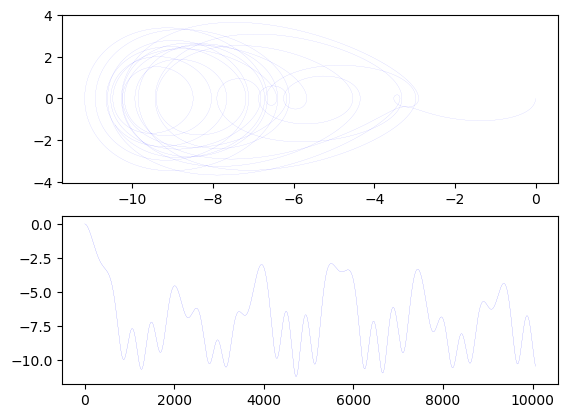

  2.415235 seconds (10.04 M allocations: 381.555 MiB, 4.86% gc time)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x15070fc90>

In [7]:
initial_position = [0.1, 0.,0.,0.]
initial_momentum=[0. ,0.1,0.,0.]

a=0.2
b=0.01

m=[1.,0.1,0.1,0.1]
w=[0.,0.8,0.8,0.8]
g=[0.,0.1,0.1,0.1]

X0=17.    
P0=1.
W=0.6324555320336759
time=100.
tspan=(0., time)
#fig=figure()
m[2]=0.1
m[3]=0.1
m[4]=0.1
w[2]=0.6324555320336759
g[2]=0.07
w[3]=0.6324555320336759*1.2639842760097928
g[3]=0.07
w[4]=0.6324555320336759*0.6925256939166184
g[4]=0.07

dts=0.001*2. *pi/W
Hsys(q,p) = p[1]^2. /(2. *m[1]) - a*q[1]^2. /2. +b*q[1]^4. /4. +q[1]*g[2]*q[2]+p[2]^2. /(2. *m[2])+m[2]*w[2]^2. *q[2]^2. /2. +q[1]*g[3]*q[3]+p[3]^2. /(2. *m[3])+m[3]*w[3]^2. *q[3]^2. /2. +q[1]*g[4]*q[4]+p[4]^2. /(2. *m[4])+m[4]*w[4]^2. *q[4]^2. /2. 
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p), p)

initial_position[1]=0. #xz0[jj]
initial_momentum[1]=0. #pz1[jj]
initial_position[2]=5.#Xz0[jj]
initial_momentum[2]=-0.25#Pz1[jj]
initial_position[3]=4.#Xz0[jj]
initial_momentum[3]=-0.2#Pz1[jj]
initial_position[4]=7.#Xz0[jj]
initial_momentum[4]=-0.35#Pz1[jj]
 
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
@time sol4 = solve(prob, CalvoSanz4(), dt=dts);
subplot(2, 1, 1)
plot(sol4[5,:],sol4[1,:],color="b",linewidth=0.05,alpha=0.8)
subplot(2, 1, 2)
plot(sol4[5,:],color="b",linewidth=0.1,alpha=0.8)